In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'../data/Spotify_Dataset_V3.csv', delimiter=';')

print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print("DATASET OVERVIEW:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns}")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")

print("\nApplying fixes...")

df['Loudness'] = df['Loudness'] / 1000

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

print(f"Loudness range: {df['Loudness'].min():.2f} to {df['Loudness'].max():.2f} dB")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nSample loudness values:")
print(df['Loudness'].head(10).values)


Data loaded: 651936 rows, 20 columns
DATASET OVERVIEW:
Shape: (651936, 20)
Columns: Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL'],
      dtype='object')
Date Range: 01/01/2017 to 31/12/2022

Applying fixes...
Loudness range: -34.48 to 1.51 dB
Date range: 2017-01-01 00:00:00 to 2023-05-29 00:00:00

Sample loudness values:
[-5.176 -5.176 -4.019 -5.678 -5.678 -8.332 -4.076 -4.076 -4.325 -9.475]


In [3]:


# Create unique songs dataset
df_songs = df.groupby('id').agg({
    # Song identifiers
    'Title': 'first',
    'Artists': 'first',
    
    # Audio features 
    'Danceability': 'mean',
    'Energy': 'mean',
    'Loudness': 'mean',
    'Speechiness': 'mean',
    'Acousticness': 'mean',
    'Instrumentalness': 'mean',
    'Valence': 'mean',
    
    # Success metrics
    'Points (Total)': 'sum',  # Total accumulated points
    'Rank': 'min',  # Best rank achieved
    
    # Temporal information
    'Date': 'min',  # First appearance
    
    # Geographic/Artist info
    'Nationality': 'first',
    'Continent': 'first',
    
    # Derived metrics
    'id': 'count'  # Number of chart appearances
}).rename(columns={'id': 'Chart_Appearances'}).reset_index()

print(f"Original rows: {len(df):,}")
print(f"Unique songs: {len(df_songs):,}")
print(f"Compression ratio: {len(df) / len(df_songs):.1f}x")

print(df_songs.head(10))

print("SUCCESS METRICS DISTRIBUTION:")
print(df_songs[['Points (Total)', 'Chart_Appearances', 'Rank']].describe())

Original rows: 651,936
Unique songs: 9,161
Compression ratio: 71.2x
                       id                                 Title  \
0  000xQL6tZNLJzIrtIgxqSl  Still Got Time (feat. PARTYNEXTDOOR)   
1  003VDDA7J3Xb2ZFlNx7nIZ                               YELL OH   
2  003eoIwxETJujVWmNFMoZy                         Growing Pains   
3  003vvx7Niy0yvhvHt4a68B                        Mr. Brightside   
4  00B7TZ0Xawar6NZ00JFomN   Best Life (feat. Chance The Rapper)   
5  00Blm7zeNqgYLPtW6zg8cj       One Right Now (with The Weeknd)   
6  00EPIEnX1JFjff8sC6bccd                         No Me Acuerdo   
7  00ETaeHUQ6lops3oWU1Wrt                             Hot Stuff   
8  00Ga884hbpVvCNyeQdle1U                      Violet Chemistry   
9  00I41xsW6SunZDJ5fB8KAd                           Safety Zone   

                    Artists  Danceability  Energy  Loudness  Speechiness  \
0                      ZAYN         0.748   0.627  -6.02900        0.064   
1  Trippie Redd, Young Thug         0.842 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print(" TARGET VARIABLE ANALYSIS")

# Analyze Points distribution
print("\nPOINTS DISTRIBUTION:")
print(f"Mean: {df_songs['Points (Total)'].mean():,.0f}")
print(f"Median: {df_songs['Points (Total)'].median():,.0f}")
print(f"Std: {df_songs['Points (Total)'].std():,.0f}")

print("\nPERCENTILES:")
percentiles = [50, 70, 80, 90, 95, 99]
for p in percentiles:
    val = df_songs['Points (Total)'].quantile(p/100)
    print(f"{p}th percentile: {val:,.0f} points")

print(" 3-CLASS BINS:")

# Calculating bin thresholds
p70 = df_songs['Points (Total)'].quantile(0.70)
p90 = df_songs['Points (Total)'].quantile(0.90)

print(f"\n Percentile-based (70-90-100)")
print(f"  Low:      Points ≤ {p70:,.0f}  (70% of songs)")
print(f"  Moderate: Points {p70:,.0f} - {p90:,.0f}  (20% of songs)")
print(f"  Hit:      Points > {p90:,.0f}  (10% of songs)")

# Count songs in each bin
low = (df_songs['Points (Total)'] <= p70).sum()
moderate = ((df_songs['Points (Total)'] > p70) & (df_songs['Points (Total)'] <= p90)).sum()
hit = (df_songs['Points (Total)'] > p90).sum()

print(f"\n  Distribution: {low} / {moderate} / {hit} songs")
print(f"  Percentages: {low/len(df_songs)*100:.1f}% / {moderate/len(df_songs)*100:.1f}% / {hit/len(df_songs)*100:.1f}%")

 TARGET VARIABLE ANALYSIS

POINTS DISTRIBUTION:
Mean: 7,159
Median: 661
Std: 19,183

PERCENTILES:
50th percentile: 661 points
70th percentile: 2,901 points
80th percentile: 7,012 points
90th percentile: 19,884 points
95th percentile: 38,036 points
99th percentile: 94,750 points
 3-CLASS BINS:

 Percentile-based (70-90-100)
  Low:      Points ≤ 2,901  (70% of songs)
  Moderate: Points 2,901 - 19,884  (20% of songs)
  Hit:      Points > 19,884  (10% of songs)

  Distribution: 6413 / 1832 / 916 songs
  Percentages: 70.0% / 20.0% / 10.0%


In [7]:
# Define thresholds based on percentiles
threshold_moderate = df_songs['Points (Total)'].quantile(0.70)  # 2,901
threshold_hit = df_songs['Points (Total)'].quantile(0.90)       # 19,884

# Create target variable
def classify_success(points):
    if points <= threshold_moderate:
        return 'Low'
    elif points <= threshold_hit:
        return 'Moderate'
    else:
        return 'Hit'

df_songs['Target'] = df_songs['Points (Total)'].apply(classify_success)

# Convert to ordered categorical for proper ordering in plots
df_songs['Target'] = pd.Categorical(df_songs['Target'], 
                                     categories=['Low', 'Moderate', 'Hit'], 
                                     ordered=True)
print("TARGET DISTRIBUTION:")
print(df_songs['Target'].value_counts().sort_index())
print("\nPercentages:")
print(df_songs['Target'].value_counts(normalize=True).sort_index() * 100)

print("SAMPLE SONGS BY CLASS:")
for target_class in ['Low', 'Moderate', 'Hit']:
    print(f"\n{target_class} examples:")
    sample = df_songs[df_songs['Target'] == target_class][['Title', 'Artists', 'Points (Total)', 'Chart_Appearances']].head(3)
    print(sample.to_string(index=False))

TARGET DISTRIBUTION:
Target
Low         6413
Moderate    1832
Hit          916
Name: count, dtype: int64

Percentages:
Target
Low         70.003275
Moderate    19.997817
Hit          9.998908
Name: proportion, dtype: float64
SAMPLE SONGS BY CLASS:

Low examples:
                              Title                  Artists  Points (Total)  Chart_Appearances
                            YELL OH Trippie Redd, Young Thug             252                  4
                      Growing Pains             Alessia Cara             903                 14
Best Life (feat. Chance The Rapper)                  Cardi B            1284                 14

Moderate examples:
                               Title                              Artists  Points (Total)  Chart_Appearances
Still Got Time (feat. PARTYNEXTDOOR)                                 ZAYN           11741                118
                      Mr. Brightside                          The Killers           18441                560
      

In [8]:
# Analyzing artist structure
print("\nARTIST STRUCTURE ANALYSIS:")

print("\nSample of how artists appear in original data:")
print(df[['Title', 'Artists', 'Artist (Ind.)', 'Date', 'Points (Total)']].head(10))

print("MULTI-ARTIST SONGS:")

# Counting how many artists per song in df_songs
df_songs['Num_Artists'] = df_songs['Artists'].str.count(',') + 1
print(f"\nSongs by number of artists:")
print(df_songs['Num_Artists'].value_counts().sort_index())

print(f"\nCollaboration rate: {(df_songs['Num_Artists'] > 1).sum() / len(df_songs) * 100:.1f}%")

# examples of collaborations
print("\nExamples of collaborations:")
print(df_songs[df_songs['Num_Artists'] > 1][['Title', 'Artists', 'Num_Artists']].head(5))


ARTIST STRUCTURE ANALYSIS:

Sample of how artists appear in original data:
               Title                     Artists   Artist (Ind.)       Date  \
0    Ella Baila Sola  Eslabon Armado, Peso Pluma  Eslabon Armado 2023-05-29   
1    Ella Baila Sola  Eslabon Armado, Peso Pluma      Peso Pluma 2023-05-29   
2     WHERE SHE GOES                   Bad Bunny       Bad Bunny 2023-05-29   
3    La Bebe - Remix       Yng Lvcas, Peso Pluma       Yng Lvcas 2023-05-29   
4    La Bebe - Remix       Yng Lvcas, Peso Pluma      Peso Pluma 2023-05-29   
5  Cupid - Twin Ver.                 FIFTY FIFTY     FIFTY FIFTY 2023-05-29   
6          un x100to   Grupo Frontera, Bad Bunny  Grupo Frontera 2023-05-29   
7          un x100to   Grupo Frontera, Bad Bunny       Bad Bunny 2023-05-29   
8            Flowers                 Miley Cyrus     Miley Cyrus 2023-05-29   
9           Daylight               David Kushner   David Kushner 2023-05-29   

   Points (Total)  
0             200  
1             

In [9]:

print("ARTIST FEATURES (TIME-AWARE)")

# Geting unique artist-song-date combinations from original data
artist_history = df[['Artist (Ind.)', 'id', 'Date', 'Points (Total)', 'Title']].copy()
artist_history = artist_history.rename(columns={'Artist (Ind.)': 'Artist'})

# Removing duplicates (same artist-song-date can appear multiple times due to multiple nationalities)
artist_history = artist_history.drop_duplicates(subset=['Artist', 'id', 'Date'])

# Sorting by artist and date
artist_history = artist_history.sort_values(['Artist', 'Date'])

print(f"Artist history created: {len(artist_history)} artist-song-date entries")
print(f"Unique artists: {artist_history['Artist'].nunique()}")

print("\nSample of artist history:")
print(artist_history.head(10))

# Show example: Bad Bunny's chronological song history
example_artist = 'Bad Bunny'
bunny_songs = artist_history[artist_history['Artist'] == example_artist].sort_values('Date')
print(f"\n{example_artist}'s chronological songs (first 10):")
print(bunny_songs[['Date', 'Title', 'Points (Total)']].head(10))

print(f"\nTotal {example_artist} songs: {len(bunny_songs)}")

ARTIST FEATURES (TIME-AWARE)
Artist history created: 646678 artist-song-date entries
Unique artists: 2208

Sample of artist history:
       Artist                      id       Date  Points (Total)    Title
209876   $NOT  7nc7mlSdWYeFom84zZ8Wr8 2021-05-28              90  Tell Em
209602   $NOT  7nc7mlSdWYeFom84zZ8Wr8 2021-05-29             101  Tell Em
209333   $NOT  7nc7mlSdWYeFom84zZ8Wr8 2021-05-30              94  Tell Em
209067   $NOT  7nc7mlSdWYeFom84zZ8Wr8 2021-05-31              91  Tell Em
208802   $NOT  7nc7mlSdWYeFom84zZ8Wr8 2021-06-01              89  Tell Em
208531   $NOT  7nc7mlSdWYeFom84zZ8Wr8 2021-06-02              83  Tell Em
208263   $NOT  7nc7mlSdWYeFom84zZ8Wr8 2021-06-03              72  Tell Em
207989   $NOT  7nc7mlSdWYeFom84zZ8Wr8 2021-06-04              85  Tell Em
207715   $NOT  7nc7mlSdWYeFom84zZ8Wr8 2021-06-05              71  Tell Em
207448   $NOT  7nc7mlSdWYeFom84zZ8Wr8 2021-06-06              90  Tell Em

Bad Bunny's chronological songs (first 10):
        

In [11]:
print("CALCULATING TIME-AWARE ARTIST FEATURES")

# Aggregating artist history by song (sum points across all dates)
print("\nAggregating by artist-song")
artist_song_history = artist_history.groupby(['Artist', 'id']).agg({
    'Date': 'min',  # First appearance date
    'Points (Total)': 'sum',  # Total points for this song
    'Title': 'first'
}).reset_index()

print(f" Artist-song history: {len(artist_song_history)} unique artist-song combinations")

# Sorting by artist and date
artist_song_history = artist_song_history.sort_values(['Artist', 'Date'])

print("\nBad Bunny's songs (aggregated):")
bunny_agg = artist_song_history[artist_song_history['Artist'] == 'Bad Bunny'].head(10)
print(bunny_agg[['Date', 'Title', 'Points (Total)']])

print("Calculating features for each song")

# Function to calculate artist features based on PAST songs only
def calculate_artist_features(artist_name, song_date, artist_song_history):
    """
    Calculate artist's historical features using ONLY songs released BEFORE song_date
    """
    # Get artist's past songs (released before this song)
    past_songs = artist_song_history[
        (artist_song_history['Artist'] == artist_name) & 
        (artist_song_history['Date'] < song_date)
    ]
    
    if len(past_songs) == 0:
        # This is artist's first song (debut)
        return {
            'Artist_Past_Avg_Points': 0,
            'Artist_Past_Max_Points': 0,
            'Artist_Experience': 0,
            'Artist_Days_Since_Last': -1,  # -1 indicates no previous song
            'Is_Debut': 1
        }
    
    # Calculating features from past performance
    avg_points = past_songs['Points (Total)'].mean()
    max_points = past_songs['Points (Total)'].max()
    experience = len(past_songs)
    
    # Days since last release
    last_release = past_songs['Date'].max()
    days_since = (song_date - last_release).days
    
    return {
        'Artist_Past_Avg_Points': avg_points,
        'Artist_Past_Max_Points': max_points,
        'Artist_Experience': experience,
        'Artist_Days_Since_Last': days_since,
        'Is_Debut': 0
    }

# Testing on one song
test_song = df_songs.iloc[0]
test_date = test_song['Date']
test_artist = test_song['Artists'].split(',')[0].strip()

print(f"\nTest: Calculating features for '{test_song['Title']}' by {test_artist}")
print(f"Release date: {test_date}")

test_features = calculate_artist_features(test_artist, test_date, artist_song_history)
print(f"\nArtist features:")
for key, value in test_features.items():
    print(f"  {key}: {value}")

CALCULATING TIME-AWARE ARTIST FEATURES

Aggregating by artist-song
 Artist-song history: 12396 unique artist-song combinations

Bad Bunny's songs (aggregated):
           Date                     Title  Points (Total)
1175 2017-05-20  Si Tu Novio Te Deja Sola             252
1293 2017-07-27                   Mayores           32910
1232 2017-08-07               Krippy Kush            4266
1276 2017-08-08            Ahora Me Llama            3238
1228 2017-08-16           Báilame - Remix           26622
1240 2017-09-05                 Explícale              61
1292 2017-09-15               Krippy Kush            4555
1181 2017-10-03                    Vuelve           14254
1186 2017-10-27            Ahora Me Llama             111
1271 2017-11-03               Sensualidad           29401
Calculating features for each song

Test: Calculating features for 'Still Got Time (feat. PARTYNEXTDOOR)' by ZAYN
Release date: 2017-03-24 00:00:00

Artist features:
  Artist_Past_Avg_Points: 26926.5
  

In [15]:
print("APPLYING ARTIST FEATURES TO ALL SONGS")

from tqdm import tqdm

# Initializing feature columns
feature_cols = ['Artist_Past_Avg_Points', 'Artist_Past_Max_Points', 
                'Artist_Experience', 'Artist_Days_Since_Last', 'Is_Debut']

for col in feature_cols:
    df_songs[col] = 0.0

# Processing each song
for idx, row in tqdm(df_songs.iterrows(), total=len(df_songs), desc="Processing songs"):
    song_date = row['Date']
    artists_str = row['Artists']
    
    # Split multiple artists
    artist_list = [a.strip() for a in artists_str.split(',')]
    
    # Calculate features for each artist
    all_features = []
    for artist in artist_list:
        features = calculate_artist_features(artist, song_date, artist_song_history)
        all_features.append(features)
    
    # Average features across all artists (for collaborations)
    for col in feature_cols:
        avg_value = np.mean([f[col] for f in all_features])
        df_songs.at[idx, col] = avg_value

print("FEATURE SUMMARY:")
print(df_songs[feature_cols].describe())

print("SAMPLE SONGS WITH ARTIST FEATURES:")
sample_cols = ['Title', 'Artists', 'Date', 'Target'] + feature_cols
print(df_songs[sample_cols].head(10))


APPLYING ARTIST FEATURES TO ALL SONGS


Processing songs: 100%|██████████| 9161/9161 [00:13<00:00, 699.98it/s]

FEATURE SUMMARY:
       Artist_Past_Avg_Points  Artist_Past_Max_Points  Artist_Experience  \
count             9161.000000             9161.000000        9161.000000   
mean              5783.698614            29858.553493          17.726390   
std               7929.018846            39876.652108          27.014659   
min                  0.000000                0.000000           0.000000   
25%                350.000000              799.000000           2.000000   
50%               3459.166667            18127.000000           7.000000   
75%               8513.955882            44213.000000          22.333333   
max             198747.000000           227794.000000         211.000000   

       Artist_Days_Since_Last     Is_Debut  
count             9161.000000  9161.000000  
mean                93.557078     0.191752  
std                172.209396     0.369567  
min                 -1.000000     0.000000  
25%                  4.000000     0.000000  
50%                 28.00000

In [18]:
print("ADDING COLLABORATION FEATURE")

# Creating binary collaboration flag
df_songs['Is_Collaboration'] = (df_songs['Num_Artists'] > 1).astype(int)

print(f"Solo songs: {(df_songs['Is_Collaboration'] == 0).sum()} ({(df_songs['Is_Collaboration'] == 0).sum()/len(df_songs)*100:.1f}%)")
print(f"Collaborations: {(df_songs['Is_Collaboration'] == 1).sum()} ({(df_songs['Is_Collaboration'] == 1).sum()/len(df_songs)*100:.1f}%)")

# Defining feature groups
audio_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 
                  'Acousticness', 'Instrumentalness', 'Valence']

artist_features = ['Artist_Past_Avg_Points', 'Artist_Past_Max_Points', 
                   'Artist_Experience', 'Artist_Days_Since_Last', 'Is_Debut',
                   'Is_Collaboration', 'Num_Artists']

all_features = audio_features + artist_features

print(f"\nAUDIO FEATURES ({len(audio_features)}):")
print("  - " + "\n  - ".join(audio_features))

print(f"\nARTIST FEATURES ({len(artist_features)}):")
print("  - " + "\n  - ".join(artist_features))

print(f"\nTARGET: Target (3 classes: Low/Moderate/Hit)")

print(f"\nTotal features: {len(all_features)}")
print(f"Total samples: {len(df_songs)}")
print(f"Feature-to-sample ratio: 1:{len(df_songs)/len(all_features):.0f}")


ADDING COLLABORATION FEATURE
Solo songs: 6863 (74.9%)
Collaborations: 2298 (25.1%)

AUDIO FEATURES (7):
  - Danceability
  - Energy
  - Loudness
  - Speechiness
  - Acousticness
  - Instrumentalness
  - Valence

ARTIST FEATURES (7):
  - Artist_Past_Avg_Points
  - Artist_Past_Max_Points
  - Artist_Experience
  - Artist_Days_Since_Last
  - Is_Debut
  - Is_Collaboration
  - Num_Artists

TARGET: Target (3 classes: Low/Moderate/Hit)

Total features: 14
Total samples: 9161
Feature-to-sample ratio: 1:654


### EDA


UNIVARIATE ANALYSIS - AUDIO FEATURES

 Audio features distribution plot saved!


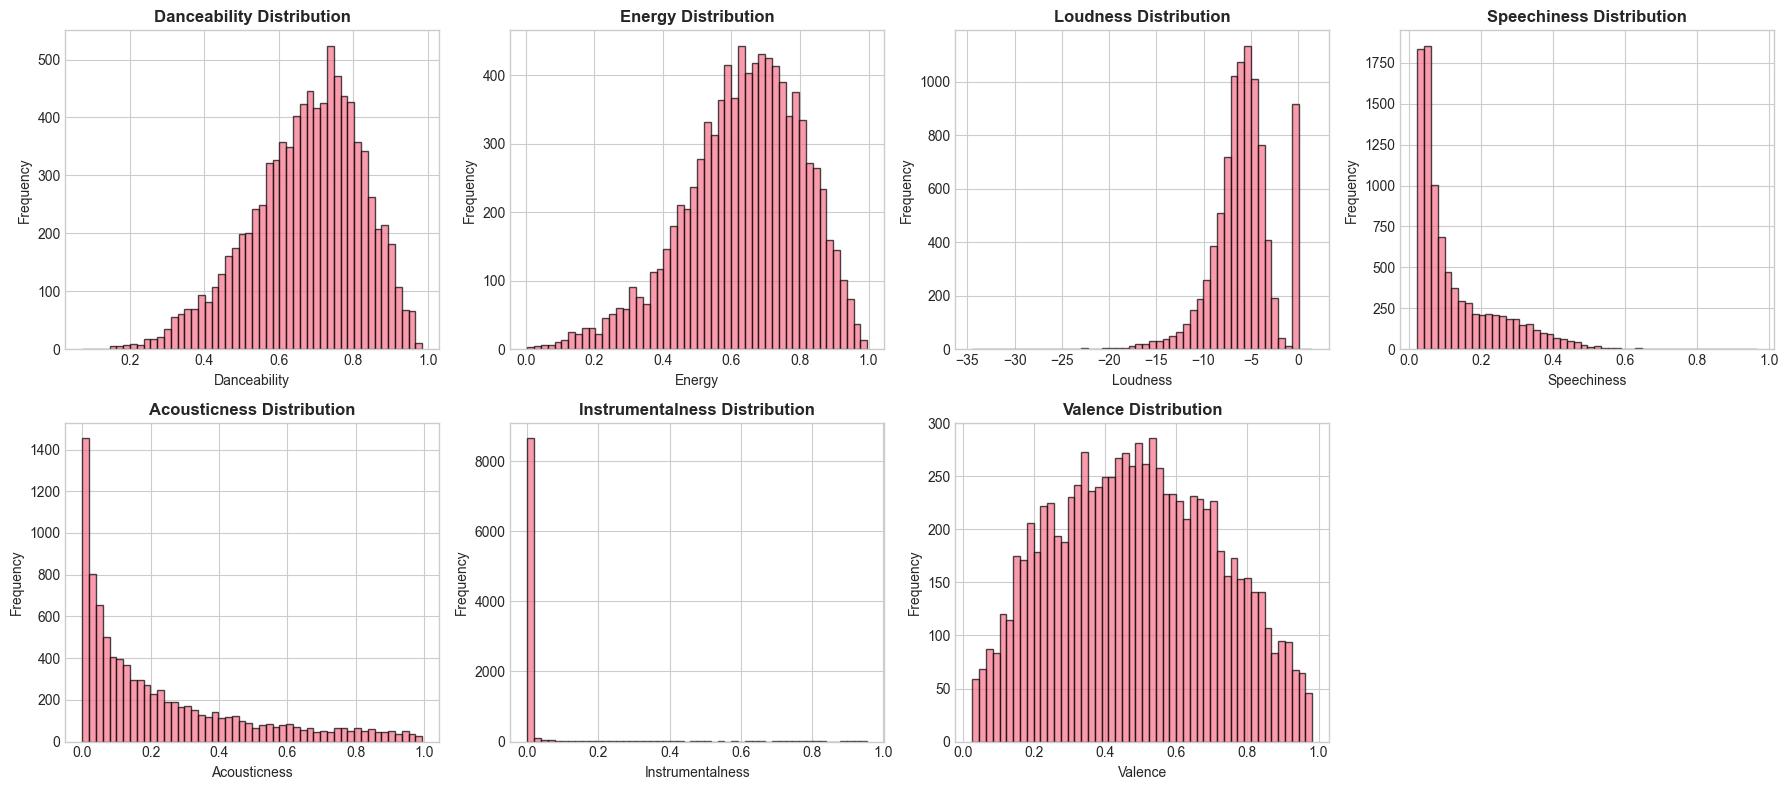

AUDIO FEATURES STATISTICS:
       Danceability       Energy     Loudness  Speechiness  Acousticness  \
count   9161.000000  9161.000000  9161.000000  9161.000000   9161.000000   
mean       0.674146     0.636076    -5.817698     0.128299      0.234024   
std        0.147904     0.170402     3.146007     0.117881      0.248563   
min        0.073000     0.005000   -34.475000     0.022000      0.000000   
25%        0.581000     0.532000    -7.397000     0.044000      0.040000   
50%        0.691000     0.651000    -5.741000     0.076000      0.139000   
75%        0.782000     0.761000    -4.207000     0.180000      0.351000   
max        0.985000     0.996000     1.509000     0.966000      0.994000   

       Instrumentalness      Valence  
count       9161.000000  9161.000000  
mean           0.013770     0.486465  
std            0.082544     0.226281  
min            0.000000     0.026000  
25%            0.000000     0.310000  
50%            0.000000     0.482000  
75%            

In [19]:
print("\nUNIVARIATE ANALYSIS - AUDIO FEATURES")

audio_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness',
                  'Acousticness', 'Instrumentalness', 'Valence']

# Creating a 2x4 grid (8 subplots total)
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.ravel()

# Ploting the 7 features
for i, feature in enumerate(audio_features):
    axes[i].hist(df_songs[feature], bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Deleting the extra (8th) empty subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.savefig('uni_audio.png', dpi=300)
print("\n Audio features distribution plot saved!")
plt.show()

# Statistical summary
print("AUDIO FEATURES STATISTICS:")
print(df_songs[audio_features].describe())

UNIVARIATE ANALYSIS - ARTIST FEATURES

 Artist features distribution plot saved!


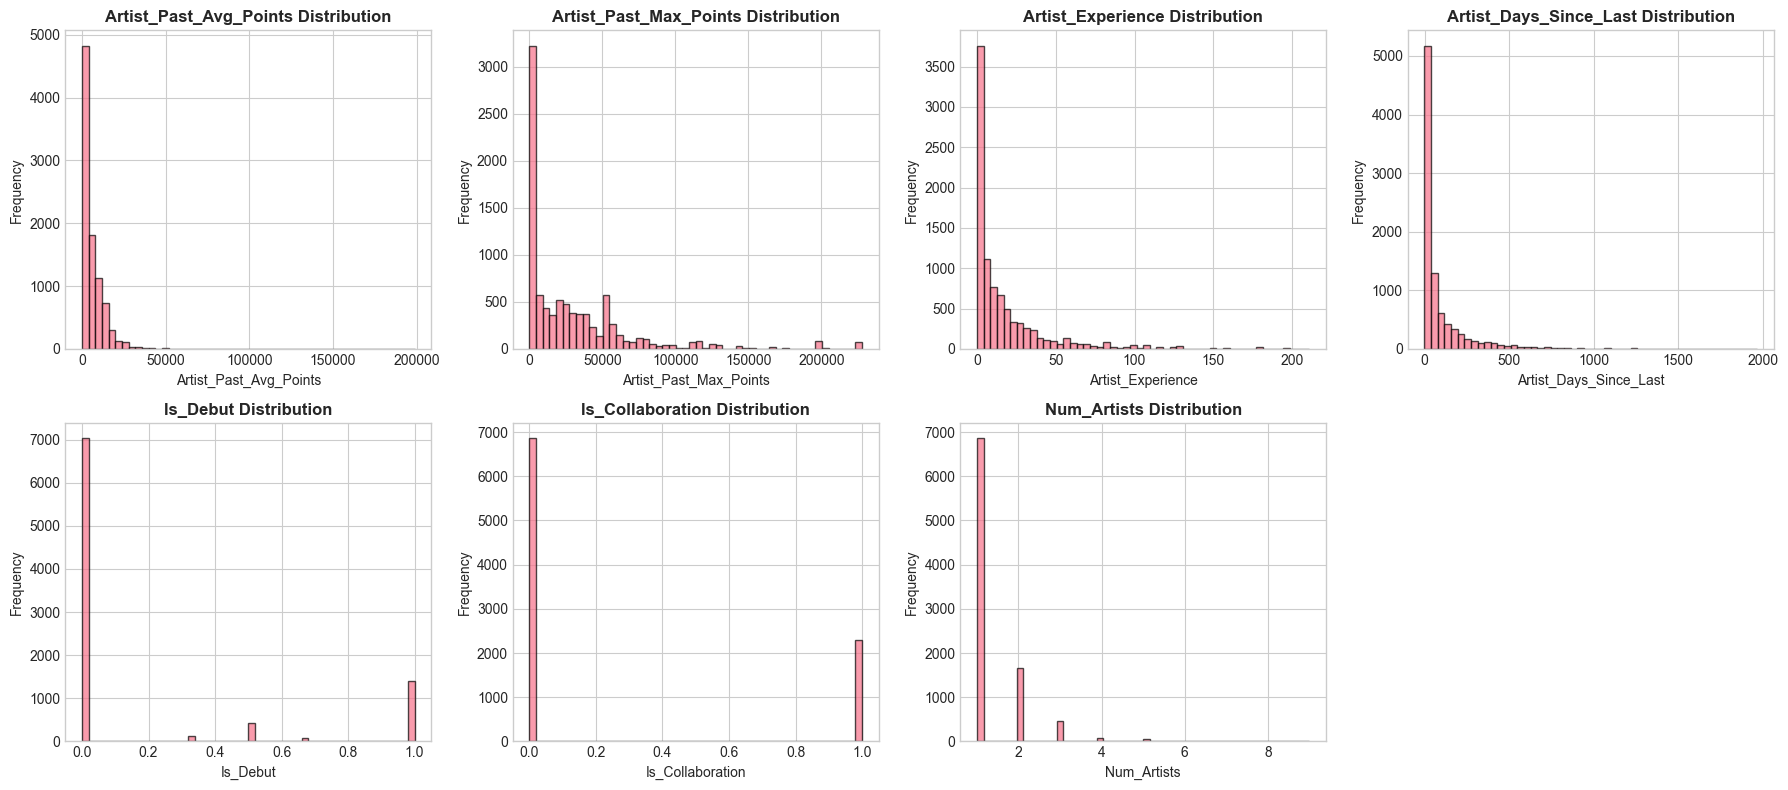

ARTIST FEATURES STATISTICS:
       Artist_Past_Avg_Points  Artist_Past_Max_Points  Artist_Experience  \
count                 9161.00                 9161.00            9161.00   
mean                  5783.70                29858.55              17.73   
std                   7929.02                39876.65              27.01   
min                      0.00                    0.00               0.00   
25%                    350.00                  799.00               2.00   
50%                   3459.17                18127.00               7.00   
75%                   8513.96                44213.00              22.33   
max                 198747.00               227794.00             211.00   

       Artist_Days_Since_Last  Is_Debut  Is_Collaboration  Num_Artists  
count                 9161.00   9161.00           9161.00      9161.00  
mean                    93.56      0.19              0.25         1.36  
std                    172.21      0.37              0.43         0.

In [20]:
print("UNIVARIATE ANALYSIS - ARTIST FEATURES")

artist_features = ['Artist_Past_Avg_Points', 'Artist_Past_Max_Points', 
                   'Artist_Experience', 'Artist_Days_Since_Last', 
                   'Is_Debut', 'Is_Collaboration', 'Num_Artists']

# Creating a 2x4 grid (8 subplots total)
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.ravel()

# Ploting the 7 features
for i, feature in enumerate(artist_features):
    axes[i].hist(df_songs[feature], bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Deleting the extra (8th) empty subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.savefig('uni_artist.png', dpi=300)
print("\n Artist features distribution plot saved!")
plt.show()

# Statistical summary
print("ARTIST FEATURES STATISTICS:")
print(df_songs[artist_features].describe().round(2))

# Special analysis for categorical features
print("CATEGORICAL FEATURES BREAKDOWN:")
print(f"\nIs_Debut:")
print(df_songs['Is_Debut'].value_counts())
print(f"\nIs_Collaboration:")
print(df_songs['Is_Collaboration'].value_counts())
print(f"\nNum_Artists distribution:")
print(df_songs['Num_Artists'].value_counts().sort_index())

BIVARIATE ANALYSIS - FEATURES vs TARGET

 AUDIO FEATURES BY TARGET CLASS:
Audio features by target plot saved!


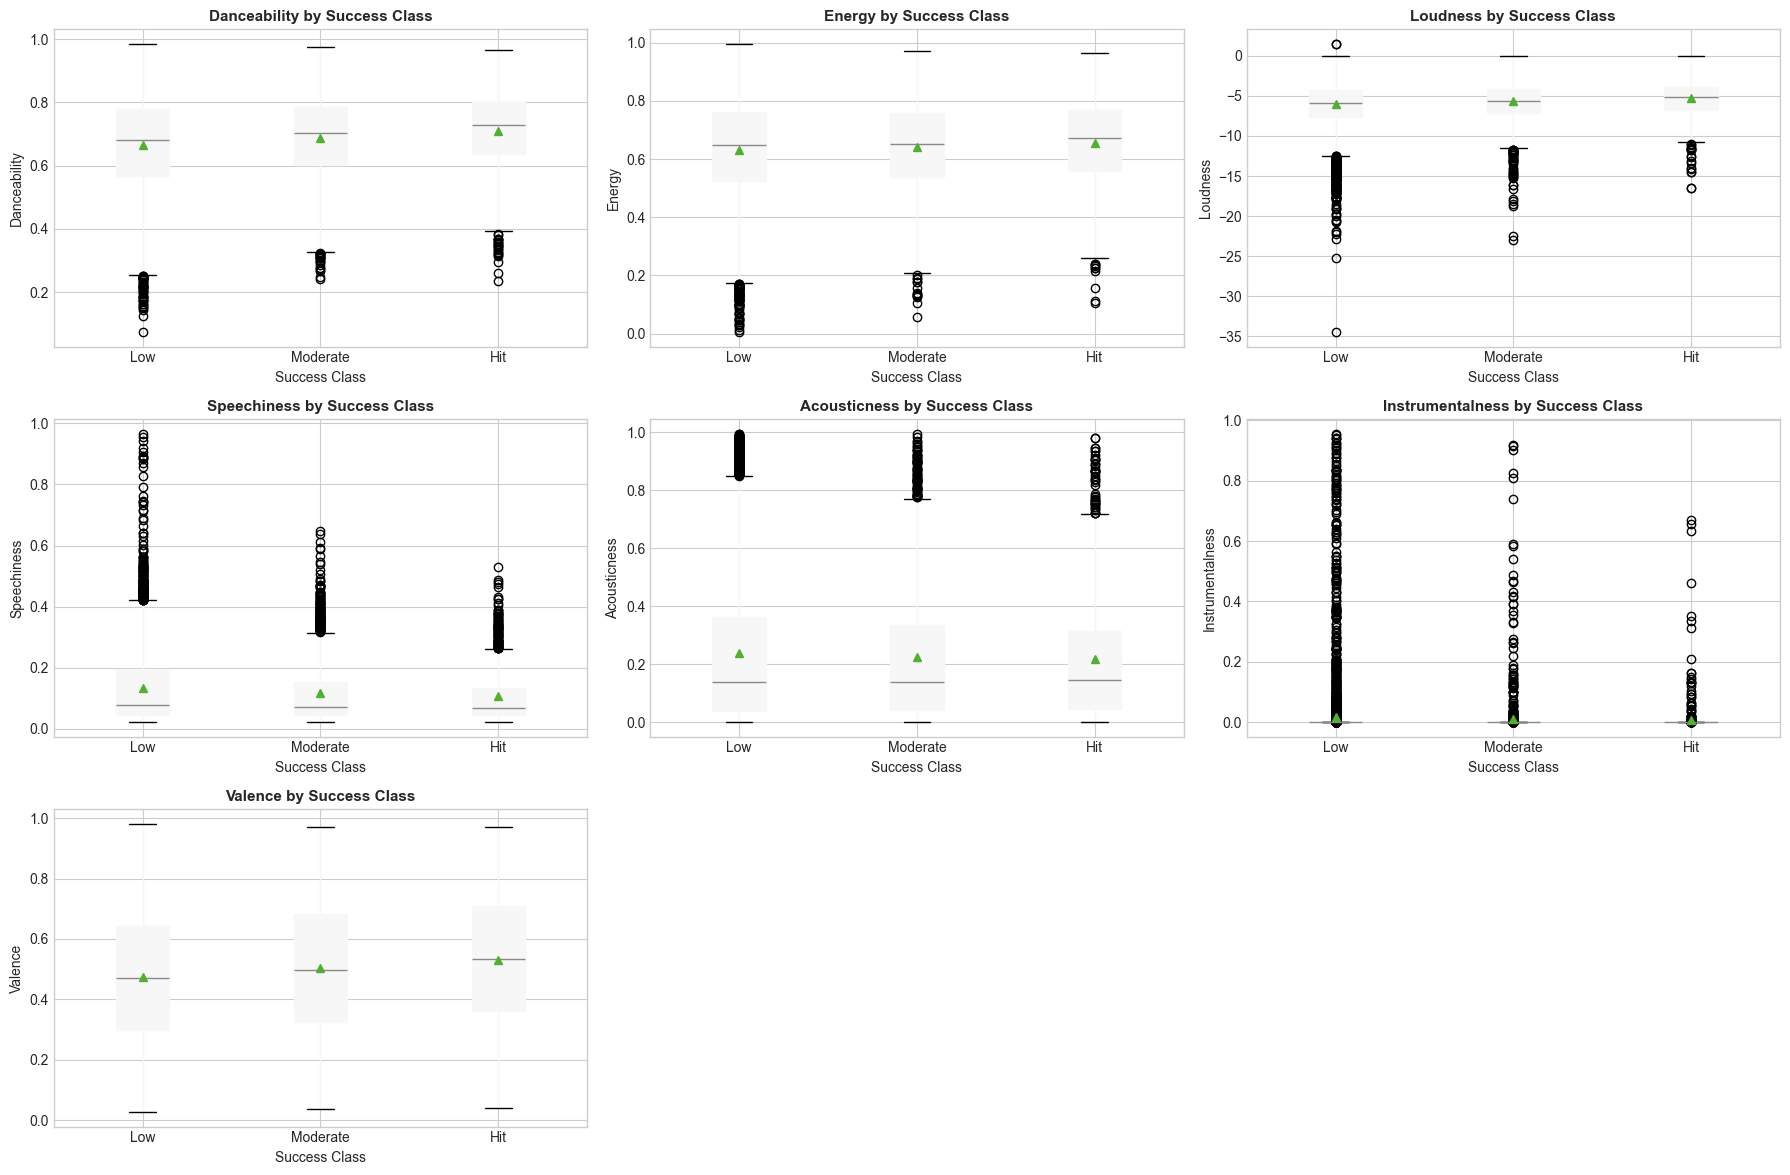

AUDIO FEATURES - MEAN BY TARGET CLASS:
          Danceability  Energy  Loudness  Speechiness  Acousticness  \
Target                                                                
Low              0.665   0.632    -5.967        0.134         0.239   
Moderate         0.689   0.642    -5.601        0.118         0.225   
Hit              0.708   0.655    -5.205        0.108         0.217   

          Instrumentalness  Valence  
Target                               
Low                  0.016    0.475  
Moderate             0.010    0.504  
Hit                  0.007    0.531  
DIFFERENCE: Hit - Low
Danceability        0.043
Energy              0.024
Loudness            0.763
Speechiness        -0.026
Acousticness       -0.022
Instrumentalness   -0.009
Valence             0.056
dtype: float64


In [21]:

print("BIVARIATE ANALYSIS - FEATURES vs TARGET")

# Audio features by target class
print("\n AUDIO FEATURES BY TARGET CLASS:")

audio_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 
                  'Acousticness', 'Instrumentalness', 'Valence']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(audio_features):
    # Boxplot by target
    df_songs.boxplot(column=feature, by='Target', ax=axes[i], 
                     patch_artist=True, showmeans=True)
    axes[i].set_title(f'{feature} by Success Class', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Success Class')
    axes[i].set_ylabel(feature)
    axes[i].get_figure().suptitle('')  # Remove default title
    
# Remove empty subplots
for i in range(len(audio_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('audio_features_by_target.png', dpi=300, bbox_inches='tight')
print("Audio features by target plot saved!")
plt.show()

# Statistical comparison
print("AUDIO FEATURES - MEAN BY TARGET CLASS:")
audio_by_target = df_songs.groupby('Target')[audio_features].mean()
print(audio_by_target.round(3))

print("DIFFERENCE: Hit - Low")
diff = audio_by_target.loc['Hit'] - audio_by_target.loc['Low']
print(diff.round(3))

ARTIST FEATURES BY TARGET CLASS:
Artist features by target plot saved!


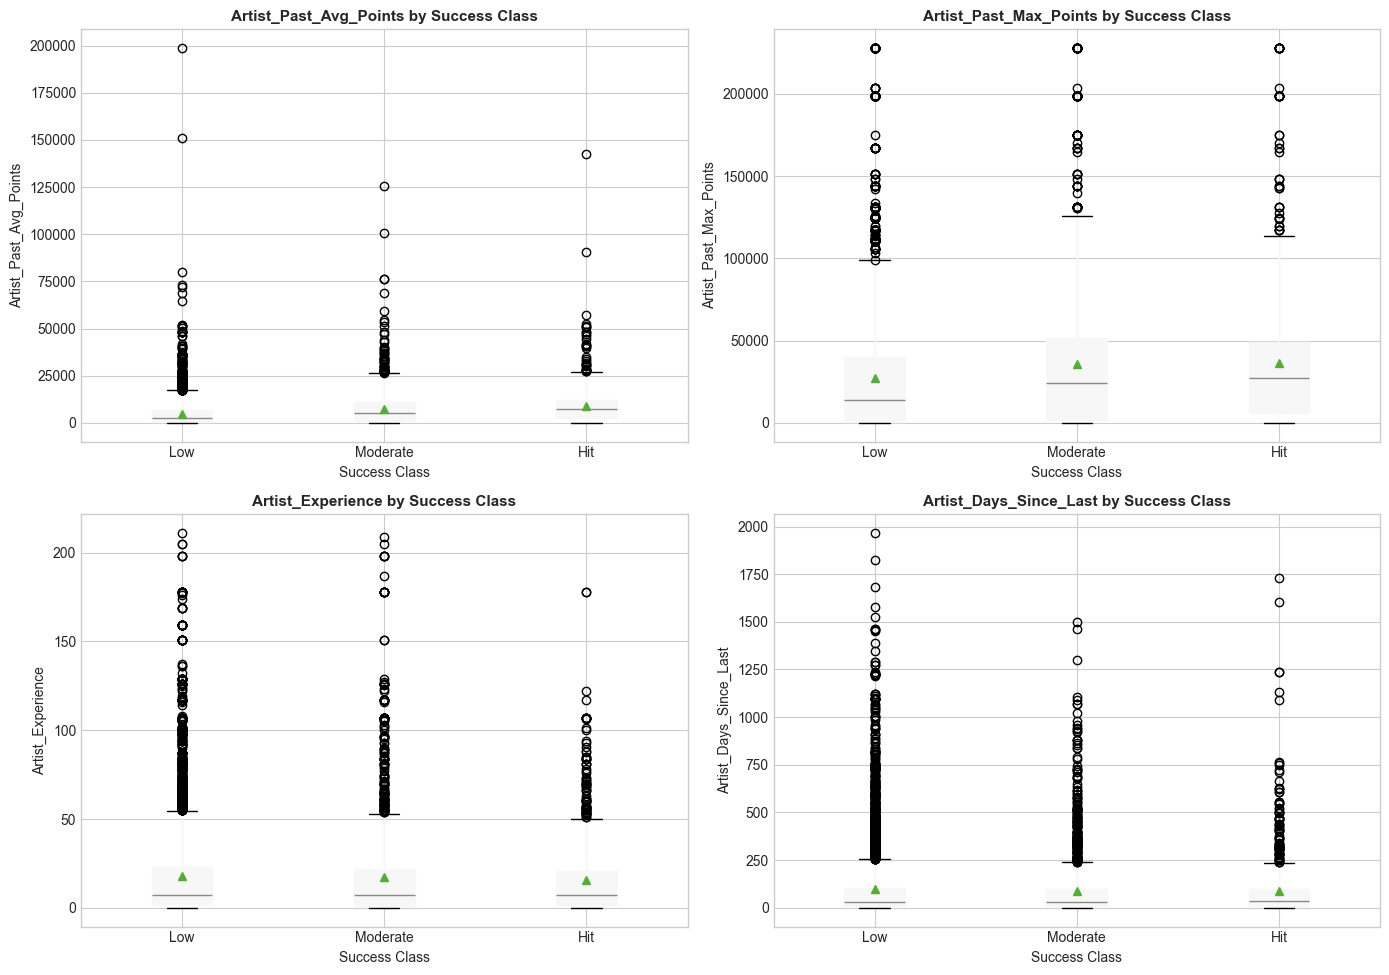

ARTIST FEATURES - MEAN BY TARGET CLASS:
          Artist_Past_Avg_Points  Artist_Past_Max_Points  Artist_Experience  \
Target                                                                        
Low                       4854.6                 27143.0               18.1   
Moderate                  7394.1                 35969.7               17.5   
Hit                       9067.9                 36648.5               15.7   

          Artist_Days_Since_Last  
Target                            
Low                         95.9  
Moderate                    88.2  
Hit                         87.9  
DIFFERENCE: Hit - Low
Artist_Past_Avg_Points    4213.3
Artist_Past_Max_Points    9505.5
Artist_Experience           -2.4
Artist_Days_Since_Last      -8.0
dtype: float64
PERCENTAGE INCREASE: (Hit - Low) / Low * 100
Artist_Past_Avg_Points    86.8
Artist_Past_Max_Points    35.0
Artist_Experience        -13.1
Artist_Days_Since_Last    -8.4
dtype: float64
COLLABORATION RATE BY TARGET:
Target

In [22]:

print("ARTIST FEATURES BY TARGET CLASS:")

artist_features = ['Artist_Past_Avg_Points', 'Artist_Past_Max_Points', 
                   'Artist_Experience', 'Artist_Days_Since_Last']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, feature in enumerate(artist_features):
    df_songs.boxplot(column=feature, by='Target', ax=axes[i], 
                     patch_artist=True, showmeans=True)
    axes[i].set_title(f'{feature} by Success Class', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Success Class')
    axes[i].set_ylabel(feature)
    axes[i].get_figure().suptitle('')

plt.tight_layout()
plt.savefig('artist_features_by_target.png', dpi=300, bbox_inches='tight')
print("Artist features by target plot saved!")
plt.show()

# Statistical comparison
print("ARTIST FEATURES - MEAN BY TARGET CLASS:")
artist_by_target = df_songs.groupby('Target')[artist_features].mean()
print(artist_by_target.round(1))

print("DIFFERENCE: Hit - Low")
diff_artist = artist_by_target.loc['Hit'] - artist_by_target.loc['Low']
print(diff_artist.round(1))

print("PERCENTAGE INCREASE: (Hit - Low) / Low * 100")
pct_change = ((artist_by_target.loc['Hit'] - artist_by_target.loc['Low']) / artist_by_target.loc['Low'] * 100)
print(pct_change.round(1))

# Categorical features
print("COLLABORATION RATE BY TARGET:")
collab_by_target = df_songs.groupby('Target')['Is_Collaboration'].mean() * 100
print(collab_by_target.round(1))

CORRELATION ANALYSIS
Correlation heatmap saved!


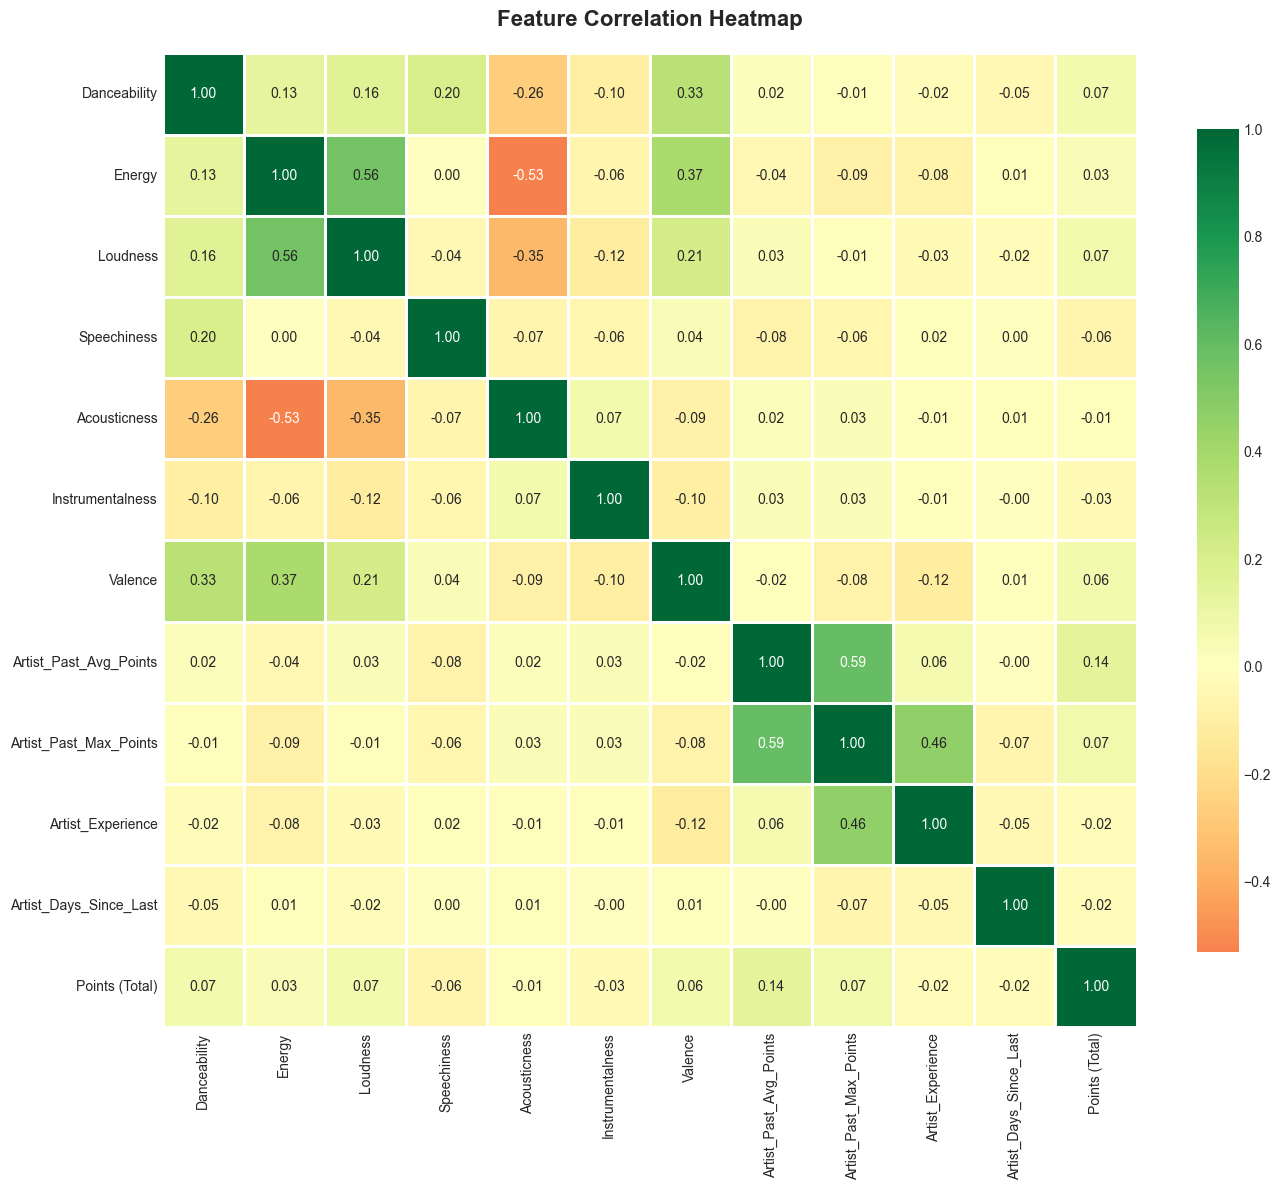

CORRELATIONS WITH SUCCESS (Points Total):
Points (Total)            1.000000
Artist_Past_Avg_Points    0.137041
Artist_Past_Max_Points    0.072597
Danceability              0.068682
Loudness                  0.065863
Valence                   0.064056
Energy                    0.034540
Acousticness             -0.006734
Artist_Experience        -0.017769
Artist_Days_Since_Last   -0.019859
Instrumentalness         -0.030113
Name: Points (Total), dtype: float64


In [23]:
print("CORRELATION ANALYSIS")

# Select all numeric features
all_features = audio_features + artist_features
correlation_data = df_songs[all_features + ['Points (Total)']].copy()

# Calculate correlation matrix
corr_matrix = correlation_data.corr()

# Create heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("Correlation heatmap saved!")
plt.show()

# Show correlations with target (Points)
print("CORRELATIONS WITH SUCCESS (Points Total):")
correlations_with_target = corr_matrix['Points (Total)'].sort_values(ascending=False)
print(correlations_with_target[:-1])  # Exclude Points (Total) itself

### Modelling

In [24]:
print(" MODEL BUILDING & COMPARISON")

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, f1_score, precision_score, 
                             recall_score, roc_auc_score)


# Define feature sets
audio_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 
                  'Acousticness', 'Instrumentalness', 'Valence']

artist_features = ['Artist_Past_Avg_Points', 'Artist_Past_Max_Points', 
                   'Artist_Experience', 'Artist_Days_Since_Last', 
                   'Is_Debut', 'Is_Collaboration', 'Num_Artists']

all_features = audio_features + artist_features

print(f"Audio Features ({len(audio_features)}): {', '.join(audio_features)}")
print(f"Artist Features ({len(artist_features)}): {', '.join(artist_features)}")
print(f"Combined Features ({len(all_features)})")

# Prepare feature matrices
X_audio = df_songs[audio_features].copy()
X_artist = df_songs[artist_features].copy()
X_combined = df_songs[all_features].copy()
y = df_songs['Target'].copy()

print("TRAIN/TEST SPLIT (80/20, STRATIFIED)")

# Set random state for reproducibility
RANDOM_STATE = 42

# Split each feature set
X_audio_train, X_audio_test, y_train, y_test = train_test_split(
    X_audio, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

X_artist_train, X_artist_test, _, _ = train_test_split(
    X_artist, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

X_combined_train, X_combined_test, _, _ = train_test_split(
    X_combined, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"Total samples: {len(df_songs):,}")
print(f"Training set: {len(X_audio_train):,} samples ({len(X_audio_train)/len(df_songs)*100:.1f}%)")
print(f"Test set: {len(X_audio_test):,} samples ({len(X_audio_test)/len(df_songs)*100:.1f}%)")

print(f"\nClass Distribution:")
print("\nTraining set:")
print(y_train.value_counts().sort_index())
print("\nTest set:")
print(y_test.value_counts().sort_index())


# Scale features
scaler_audio = StandardScaler()
scaler_artist = StandardScaler()
scaler_combined = StandardScaler()

X_audio_train_scaled = scaler_audio.fit_transform(X_audio_train)
X_audio_test_scaled = scaler_audio.transform(X_audio_test)

X_artist_train_scaled = scaler_artist.fit_transform(X_artist_train)
X_artist_test_scaled = scaler_artist.transform(X_artist_test)

X_combined_train_scaled = scaler_combined.fit_transform(X_combined_train)
X_combined_test_scaled = scaler_combined.transform(X_combined_test)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
print(f"CV folds: {cv.get_n_splits()}")

 MODEL BUILDING & COMPARISON
Audio Features (7): Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Valence
Artist Features (7): Artist_Past_Avg_Points, Artist_Past_Max_Points, Artist_Experience, Artist_Days_Since_Last, Is_Debut, Is_Collaboration, Num_Artists
Combined Features (14)
TRAIN/TEST SPLIT (80/20, STRATIFIED)
Total samples: 9,161
Training set: 7,328 samples (80.0%)
Test set: 1,833 samples (20.0%)

Class Distribution:

Training set:
Target
Low         5130
Moderate    1465
Hit          733
Name: count, dtype: int64

Test set:
Target
Low         1283
Moderate     367
Hit          183
Name: count, dtype: int64
CV folds: 5


In [27]:
print(" ALGORITHM 1: RANDOM FOREST CLASSIFIER")

# Initialize models
rf_audio = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=RANDOM_STATE,
    class_weight='balanced',  # Handle imbalanced classes
    n_jobs=-1
)

rf_artist = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=RANDOM_STATE,
    class_weight='balanced',
    n_jobs=-1
)

rf_combined = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=RANDOM_STATE,
    class_weight='balanced',
    n_jobs=-1
)

# Store results
rf_results = {}

# Model A: Audio Only
print("\n MODEL A: AUDIO FEATURES ONLY")

# Cross-validation on training set
cv_scores_audio = cross_val_score(rf_audio, X_audio_train, y_train, 
                                   cv=cv, scoring='accuracy', n_jobs=-1)
print(f"5-Fold CV Accuracy: {cv_scores_audio.mean():.4f} (+/- {cv_scores_audio.std():.4f})")

# Train on full training set
rf_audio.fit(X_audio_train, y_train)

# Evaluate on test set
y_pred_audio = rf_audio.predict(X_audio_test)
test_acc_audio = accuracy_score(y_test, y_pred_audio)
test_f1_audio = f1_score(y_test, y_pred_audio, average='weighted')

print(f"Test Accuracy: {test_acc_audio:.4f}")
print(f"Test F1-Score (weighted): {test_f1_audio:.4f}")

rf_results['Audio'] = {
    'cv_mean': cv_scores_audio.mean(),
    'cv_std': cv_scores_audio.std(),
    'test_acc': test_acc_audio,
    'test_f1': test_f1_audio,
    'predictions': y_pred_audio
}

# Model B: Artist Only
print("\n MODEL B: ARTIST FEATURES ONLY")

cv_scores_artist = cross_val_score(rf_artist, X_artist_train, y_train, 
                                    cv=cv, scoring='accuracy', n_jobs=-1)
print(f"5-Fold CV Accuracy: {cv_scores_artist.mean():.4f} (+/- {cv_scores_artist.std():.4f})")

rf_artist.fit(X_artist_train, y_train)
y_pred_artist = rf_artist.predict(X_artist_test)
test_acc_artist = accuracy_score(y_test, y_pred_artist)
test_f1_artist = f1_score(y_test, y_pred_artist, average='weighted')

print(f"Test Accuracy: {test_acc_artist:.4f}")
print(f"Test F1-Score (weighted): {test_f1_artist:.4f}")

rf_results['Artist'] = {
    'cv_mean': cv_scores_artist.mean(),
    'cv_std': cv_scores_artist.std(),
    'test_acc': test_acc_artist,
    'test_f1': test_f1_artist,
    'predictions': y_pred_artist
}

# Model C: Combined
print("\n MODEL C: COMBINED (AUDIO + ARTIST)")

cv_scores_combined = cross_val_score(rf_combined, X_combined_train, y_train, 
                                      cv=cv, scoring='accuracy', n_jobs=-1)
print(f"5-Fold CV Accuracy: {cv_scores_combined.mean():.4f} (+/- {cv_scores_combined.std():.4f})")

rf_combined.fit(X_combined_train, y_train)
y_pred_combined = rf_combined.predict(X_combined_test)
test_acc_combined = accuracy_score(y_test, y_pred_combined)
test_f1_combined = f1_score(y_test, y_pred_combined, average='weighted')

print(f"Test Accuracy: {test_acc_combined:.4f}")
print(f"Test F1-Score (weighted): {test_f1_combined:.4f}")

rf_results['Combined'] = {
    'cv_mean': cv_scores_combined.mean(),
    'cv_std': cv_scores_combined.std(),
    'test_acc': test_acc_combined,
    'test_f1': test_f1_combined,
    'predictions': y_pred_combined
}

# Summary Table
print("\n RANDOM FOREST - PERFORMANCE SUMMARY")

import pandas as pd
rf_summary = pd.DataFrame({
    'Model': ['Audio Only', 'Artist Only', 'Combined'],
    'CV Accuracy': [rf_results['Audio']['cv_mean'], 
                    rf_results['Artist']['cv_mean'],
                    rf_results['Combined']['cv_mean']],
    'CV Std': [rf_results['Audio']['cv_std'],
               rf_results['Artist']['cv_std'],
               rf_results['Combined']['cv_std']],
    'Test Accuracy': [rf_results['Audio']['test_acc'],
                      rf_results['Artist']['test_acc'],
                      rf_results['Combined']['test_acc']],
    'Test F1-Score': [rf_results['Audio']['test_f1'],
                      rf_results['Artist']['test_f1'],
                      rf_results['Combined']['test_f1']]
})

print(rf_summary.to_string(index=False))


 ALGORITHM 1: RANDOM FOREST CLASSIFIER

 MODEL A: AUDIO FEATURES ONLY
5-Fold CV Accuracy: 0.5289 (+/- 0.0118)
Test Accuracy: 0.5188
Test F1-Score (weighted): 0.5502

 MODEL B: ARTIST FEATURES ONLY
5-Fold CV Accuracy: 0.5449 (+/- 0.0183)
Test Accuracy: 0.5297
Test F1-Score (weighted): 0.5674

 MODEL C: COMBINED (AUDIO + ARTIST)
5-Fold CV Accuracy: 0.5951 (+/- 0.0115)
Test Accuracy: 0.5908
Test F1-Score (weighted): 0.6157

 RANDOM FOREST - PERFORMANCE SUMMARY
      Model  CV Accuracy   CV Std  Test Accuracy  Test F1-Score
 Audio Only     0.528934 0.011756       0.518822       0.550166
Artist Only     0.544894 0.018336       0.529733       0.567361
   Combined     0.595113 0.011476       0.590835       0.615687


In [29]:
print(" ALGORITHM 2: LOGISTIC REGRESSION")

# Initialize models (using scaled data!)
lr_audio = LogisticRegression(
    max_iter=1000,
    random_state=RANDOM_STATE,
    class_weight='balanced',
    multi_class='multinomial',
    solver='lbfgs'
)

lr_artist = LogisticRegression(
    max_iter=1000,
    random_state=RANDOM_STATE,
    class_weight='balanced',
    multi_class='multinomial',
    solver='lbfgs'
)

lr_combined = LogisticRegression(
    max_iter=1000,
    random_state=RANDOM_STATE,
    class_weight='balanced',
    multi_class='multinomial',
    solver='lbfgs'
)

# Store results
lr_results = {}

# Model A: Audio Only
print("\n MODEL A: AUDIO FEATURES ONLY")

cv_scores_audio = cross_val_score(lr_audio, X_audio_train_scaled, y_train, 
                                   cv=cv, scoring='accuracy', n_jobs=-1)
print(f"5-Fold CV Accuracy: {cv_scores_audio.mean():.4f} (+/- {cv_scores_audio.std():.4f})")

lr_audio.fit(X_audio_train_scaled, y_train)
y_pred_audio = lr_audio.predict(X_audio_test_scaled)
test_acc_audio = accuracy_score(y_test, y_pred_audio)
test_f1_audio = f1_score(y_test, y_pred_audio, average='weighted')

print(f"Test Accuracy: {test_acc_audio:.4f}")
print(f"Test F1-Score (weighted): {test_f1_audio:.4f}")

lr_results['Audio'] = {
    'cv_mean': cv_scores_audio.mean(),
    'cv_std': cv_scores_audio.std(),
    'test_acc': test_acc_audio,
    'test_f1': test_f1_audio,
    'predictions': y_pred_audio
}

# Model B: Artist Only
print("\n MODEL B: ARTIST FEATURES ONLY")

cv_scores_artist = cross_val_score(lr_artist, X_artist_train_scaled, y_train, 
                                    cv=cv, scoring='accuracy', n_jobs=-1)
print(f"5-Fold CV Accuracy: {cv_scores_artist.mean():.4f} (+/- {cv_scores_artist.std():.4f})")

lr_artist.fit(X_artist_train_scaled, y_train)
y_pred_artist = lr_artist.predict(X_artist_test_scaled)
test_acc_artist = accuracy_score(y_test, y_pred_artist)
test_f1_artist = f1_score(y_test, y_pred_artist, average='weighted')

print(f"Test Accuracy: {test_acc_artist:.4f}")
print(f"Test F1-Score (weighted): {test_f1_artist:.4f}")

lr_results['Artist'] = {
    'cv_mean': cv_scores_artist.mean(),
    'cv_std': cv_scores_artist.std(),
    'test_acc': test_acc_artist,
    'test_f1': test_f1_artist,
    'predictions': y_pred_artist
}

# Model C: Combined
print("\n MODEL C: COMBINED (AUDIO + ARTIST)")

cv_scores_combined = cross_val_score(lr_combined, X_combined_train_scaled, y_train, 
                                      cv=cv, scoring='accuracy', n_jobs=-1)
print(f"5-Fold CV Accuracy: {cv_scores_combined.mean():.4f} (+/- {cv_scores_combined.std():.4f})")

lr_combined.fit(X_combined_train_scaled, y_train)
y_pred_combined = lr_combined.predict(X_combined_test_scaled)
test_acc_combined = accuracy_score(y_test, y_pred_combined)
test_f1_combined = f1_score(y_test, y_pred_combined, average='weighted')

print(f"Test Accuracy: {test_acc_combined:.4f}")
print(f"Test F1-Score (weighted): {test_f1_combined:.4f}")

lr_results['Combined'] = {
    'cv_mean': cv_scores_combined.mean(),
    'cv_std': cv_scores_combined.std(),
    'test_acc': test_acc_combined,
    'test_f1': test_f1_combined,
    'predictions': y_pred_combined
}

# Summary Table
print(" \n LOGISTIC REGRESSION - PERFORMANCE SUMMARY")

lr_summary = pd.DataFrame({
    'Model': ['Audio Only', 'Artist Only', 'Combined'],
    'CV Accuracy': [lr_results['Audio']['cv_mean'], 
                    lr_results['Artist']['cv_mean'],
                    lr_results['Combined']['cv_mean']],
    'CV Std': [lr_results['Audio']['cv_std'],
               lr_results['Artist']['cv_std'],
               lr_results['Combined']['cv_std']],
    'Test Accuracy': [lr_results['Audio']['test_acc'],
                      lr_results['Artist']['test_acc'],
                      lr_results['Combined']['test_acc']],
    'Test F1-Score': [lr_results['Audio']['test_f1'],
                      lr_results['Artist']['test_f1'],
                      lr_results['Combined']['test_f1']]
})

print(lr_summary.to_string(index=False))

 ALGORITHM 2: LOGISTIC REGRESSION

 MODEL A: AUDIO FEATURES ONLY
5-Fold CV Accuracy: 0.4217 (+/- 0.0073)
Test Accuracy: 0.4359
Test F1-Score (weighted): 0.4762

 MODEL B: ARTIST FEATURES ONLY
5-Fold CV Accuracy: 0.5037 (+/- 0.0172)
Test Accuracy: 0.5128
Test F1-Score (weighted): 0.5492

 MODEL C: COMBINED (AUDIO + ARTIST)
5-Fold CV Accuracy: 0.5300 (+/- 0.0172)
Test Accuracy: 0.5385
Test F1-Score (weighted): 0.5703
 
 LOGISTIC REGRESSION - PERFORMANCE SUMMARY
      Model  CV Accuracy   CV Std  Test Accuracy  Test F1-Score
 Audio Only     0.421672 0.007255       0.435897       0.476176
Artist Only     0.503681 0.017158       0.512821       0.549156
   Combined     0.530021 0.017230       0.538462       0.570350


In [30]:
print("ALGORITHM 3: XGBOOST")

# Encode target for XGBoost
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"Encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Initialize models
xgb_audio = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=RANDOM_STATE,
    eval_metric='mlogloss',
    use_label_encoder=False
)

xgb_artist = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=RANDOM_STATE,
    eval_metric='mlogloss',
    use_label_encoder=False
)

xgb_combined = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=RANDOM_STATE,
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Store results
xgb_results = {}

# Model A: Audio Only
print("\n MODEL A: AUDIO FEATURES ONLY")

cv_scores_audio = cross_val_score(xgb_audio, X_audio_train, y_train_encoded, 
                                   cv=cv, scoring='accuracy', n_jobs=-1)
print(f"5-Fold CV Accuracy: {cv_scores_audio.mean():.4f} (+/- {cv_scores_audio.std():.4f})")

xgb_audio.fit(X_audio_train, y_train_encoded)
y_pred_audio = xgb_audio.predict(X_audio_test)
test_acc_audio = accuracy_score(y_test_encoded, y_pred_audio)
test_f1_audio = f1_score(y_test_encoded, y_pred_audio, average='weighted')

print(f"Test Accuracy: {test_acc_audio:.4f}")
print(f"Test F1-Score (weighted): {test_f1_audio:.4f}")

xgb_results['Audio'] = {
    'cv_mean': cv_scores_audio.mean(),
    'cv_std': cv_scores_audio.std(),
    'test_acc': test_acc_audio,
    'test_f1': test_f1_audio
}

# Model B: Artist Only
print("\n MODEL B: ARTIST FEATURES ONLY")

cv_scores_artist = cross_val_score(xgb_artist, X_artist_train, y_train_encoded, 
                                    cv=cv, scoring='accuracy', n_jobs=-1)
print(f"5-Fold CV Accuracy: {cv_scores_artist.mean():.4f} (+/- {cv_scores_artist.std():.4f})")

xgb_artist.fit(X_artist_train, y_train_encoded)
y_pred_artist = xgb_artist.predict(X_artist_test)
test_acc_artist = accuracy_score(y_test_encoded, y_pred_artist)
test_f1_artist = f1_score(y_test_encoded, y_pred_artist, average='weighted')

print(f"Test Accuracy: {test_acc_artist:.4f}")
print(f"Test F1-Score (weighted): {test_f1_artist:.4f}")

xgb_results['Artist'] = {
    'cv_mean': cv_scores_artist.mean(),
    'cv_std': cv_scores_artist.std(),
    'test_acc': test_acc_artist,
    'test_f1': test_f1_artist
}

# Model C: Combined
print("\n MODEL C: COMBINED (AUDIO + ARTIST)")

cv_scores_combined = cross_val_score(xgb_combined, X_combined_train, y_train_encoded, 
                                      cv=cv, scoring='accuracy', n_jobs=-1)
print(f"5-Fold CV Accuracy: {cv_scores_combined.mean():.4f} (+/- {cv_scores_combined.std():.4f})")

xgb_combined.fit(X_combined_train, y_train_encoded)
y_pred_combined = xgb_combined.predict(X_combined_test)
test_acc_combined = accuracy_score(y_test_encoded, y_pred_combined)
test_f1_combined = f1_score(y_test_encoded, y_pred_combined, average='weighted')

print(f"Test Accuracy: {test_acc_combined:.4f}")
print(f"Test F1-Score (weighted): {test_f1_combined:.4f}")

xgb_results['Combined'] = {
    'cv_mean': cv_scores_combined.mean(),
    'cv_std': cv_scores_combined.std(),
    'test_acc': test_acc_combined,
    'test_f1': test_f1_combined
}

# Summary Table
print("\n XGBOOST - PERFORMANCE SUMMARY")

xgb_summary = pd.DataFrame({
    'Model': ['Audio Only', 'Artist Only', 'Combined'],
    'CV Accuracy': [xgb_results['Audio']['cv_mean'], 
                    xgb_results['Artist']['cv_mean'],
                    xgb_results['Combined']['cv_mean']],
    'CV Std': [xgb_results['Audio']['cv_std'],
               xgb_results['Artist']['cv_std'],
               xgb_results['Combined']['cv_std']],
    'Test Accuracy': [xgb_results['Audio']['test_acc'],
                      xgb_results['Artist']['test_acc'],
                      xgb_results['Combined']['test_acc']],
    'Test F1-Score': [xgb_results['Audio']['test_f1'],
                      xgb_results['Artist']['test_f1'],
                      xgb_results['Combined']['test_f1']]
})

print(xgb_summary.to_string(index=False))

ALGORITHM 3: XGBOOST
Encoding: {'Hit': np.int64(0), 'Low': np.int64(1), 'Moderate': np.int64(2)}

 MODEL A: AUDIO FEATURES ONLY
5-Fold CV Accuracy: 0.6981 (+/- 0.0019)
Test Accuracy: 0.6961
Test F1-Score (weighted): 0.5785

 MODEL B: ARTIST FEATURES ONLY
5-Fold CV Accuracy: 0.6983 (+/- 0.0027)
Test Accuracy: 0.7005
Test F1-Score (weighted): 0.6282

 MODEL C: COMBINED (AUDIO + ARTIST)
5-Fold CV Accuracy: 0.7010 (+/- 0.0028)
Test Accuracy: 0.6994
Test F1-Score (weighted): 0.6262

 XGBOOST - PERFORMANCE SUMMARY
      Model  CV Accuracy   CV Std  Test Accuracy  Test F1-Score
 Audio Only     0.698144 0.001862       0.696127       0.578536
Artist Only     0.698280 0.002679       0.700491       0.628221
   Combined     0.701010 0.002771       0.699400       0.626162


In [31]:
print("ALGORITHM 4: SUPPORT VECTOR MACHINE (SVM)")

# Initialize models (using scaled data - critical for SVM!)
svm_audio = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=RANDOM_STATE,
    class_weight='balanced'
)

svm_artist = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=RANDOM_STATE,
    class_weight='balanced'
)

svm_combined = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=RANDOM_STATE,
    class_weight='balanced'
)

# Store results
svm_results = {}

# Model A: Audio Only
print("\n MODEL A: AUDIO FEATURES ONLY")

cv_scores_audio = cross_val_score(svm_audio, X_audio_train_scaled, y_train, 
                                   cv=cv, scoring='accuracy', n_jobs=-1)
print(f"5-Fold CV Accuracy: {cv_scores_audio.mean():.4f} (+/- {cv_scores_audio.std():.4f})")

svm_audio.fit(X_audio_train_scaled, y_train)
y_pred_audio = svm_audio.predict(X_audio_test_scaled)
test_acc_audio = accuracy_score(y_test, y_pred_audio)
test_f1_audio = f1_score(y_test, y_pred_audio, average='weighted')

print(f"Test Accuracy: {test_acc_audio:.4f}")
print(f"Test F1-Score (weighted): {test_f1_audio:.4f}")

svm_results['Audio'] = {
    'cv_mean': cv_scores_audio.mean(),
    'cv_std': cv_scores_audio.std(),
    'test_acc': test_acc_audio,
    'test_f1': test_f1_audio
}

# Model B: Artist Only
print("\n MODEL B: ARTIST FEATURES ONLY")

cv_scores_artist = cross_val_score(svm_artist, X_artist_train_scaled, y_train, 
                                    cv=cv, scoring='accuracy', n_jobs=-1)
print(f"5-Fold CV Accuracy: {cv_scores_artist.mean():.4f} (+/- {cv_scores_artist.std():.4f})")

svm_artist.fit(X_artist_train_scaled, y_train)
y_pred_artist = svm_artist.predict(X_artist_test_scaled)
test_acc_artist = accuracy_score(y_test, y_pred_artist)
test_f1_artist = f1_score(y_test, y_pred_artist, average='weighted')

print(f"Test Accuracy: {test_acc_artist:.4f}")
print(f"Test F1-Score (weighted): {test_f1_artist:.4f}")

svm_results['Artist'] = {
    'cv_mean': cv_scores_artist.mean(),
    'cv_std': cv_scores_artist.std(),
    'test_acc': test_acc_artist,
    'test_f1': test_f1_artist
}

# Model C: Combined
print("\n MODEL C: COMBINED (AUDIO + ARTIST)")

cv_scores_combined = cross_val_score(svm_combined, X_combined_train_scaled, y_train, 
                                      cv=cv, scoring='accuracy', n_jobs=-1)
print(f"5-Fold CV Accuracy: {cv_scores_combined.mean():.4f} (+/- {cv_scores_combined.std():.4f})")

svm_combined.fit(X_combined_train_scaled, y_train)
y_pred_combined = svm_combined.predict(X_combined_test_scaled)
test_acc_combined = accuracy_score(y_test, y_pred_combined)
test_f1_combined = f1_score(y_test, y_pred_combined, average='weighted')

print(f"Test Accuracy: {test_acc_combined:.4f}")
print(f"Test F1-Score (weighted): {test_f1_combined:.4f}")

svm_results['Combined'] = {
    'cv_mean': cv_scores_combined.mean(),
    'cv_std': cv_scores_combined.std(),
    'test_acc': test_acc_combined,
    'test_f1': test_f1_combined
}

# Summary Table
print("\n SVM - PERFORMANCE SUMMARY")

svm_summary = pd.DataFrame({
    'Model': ['Audio Only', 'Artist Only', 'Combined'],
    'CV Accuracy': [svm_results['Audio']['cv_mean'], 
                    svm_results['Artist']['cv_mean'],
                    svm_results['Combined']['cv_mean']],
    'CV Std': [svm_results['Audio']['cv_std'],
               svm_results['Artist']['cv_std'],
               svm_results['Combined']['cv_std']],
    'Test Accuracy': [svm_results['Audio']['test_acc'],
                      svm_results['Artist']['test_acc'],
                      svm_results['Combined']['test_acc']],
    'Test F1-Score': [svm_results['Audio']['test_f1'],
                      svm_results['Artist']['test_f1'],
                      svm_results['Combined']['test_f1']]
})

print(svm_summary.to_string(index=False))

ALGORITHM 4: SUPPORT VECTOR MACHINE (SVM)

 MODEL A: AUDIO FEATURES ONLY
5-Fold CV Accuracy: 0.4076 (+/- 0.0198)
Test Accuracy: 0.4070
Test F1-Score (weighted): 0.4567

 MODEL B: ARTIST FEATURES ONLY
5-Fold CV Accuracy: 0.4959 (+/- 0.0192)
Test Accuracy: 0.4986
Test F1-Score (weighted): 0.5389

 MODEL C: COMBINED (AUDIO + ARTIST)
5-Fold CV Accuracy: 0.5224 (+/- 0.0167)
Test Accuracy: 0.5205
Test F1-Score (weighted): 0.5603

 SVM - PERFORMANCE SUMMARY
      Model  CV Accuracy   CV Std  Test Accuracy  Test F1-Score
 Audio Only     0.407618 0.019796       0.406983       0.456715
Artist Only     0.495904 0.019185       0.498636       0.538929
   Combined     0.522377 0.016694       0.520458       0.560346


 COMPREHENSIVE MODEL COMPARISON - ALL 4 ALGORITHMS

FULL RESULTS TABLE:
    Algorithm Feature Set  Test Accuracy  Test F1-Score
Random Forest  Audio Only       0.518822       0.550166
Random Forest Artist Only       0.529733       0.567361
Random Forest    Combined       0.590835       0.615687
 Logistic Reg  Audio Only       0.435897       0.476176
 Logistic Reg Artist Only       0.512821       0.549156
 Logistic Reg    Combined       0.538462       0.570350
      XGBoost  Audio Only       0.696127       0.578536
      XGBoost Artist Only       0.700491       0.628221
      XGBoost    Combined       0.699400       0.626162
          SVM  Audio Only       0.406983       0.456715
          SVM Artist Only       0.498636       0.538929
          SVM    Combined       0.520458       0.560346
ARTIST vs AUDIO PERFORMANCE GAP (Percentage Points)
          Algorithm  Audio Accuracy  Artist Accuracy  Gap (pp)   Gap (%) Winner
      Random Forest        0.518822         0.529733  1.091107  2.10

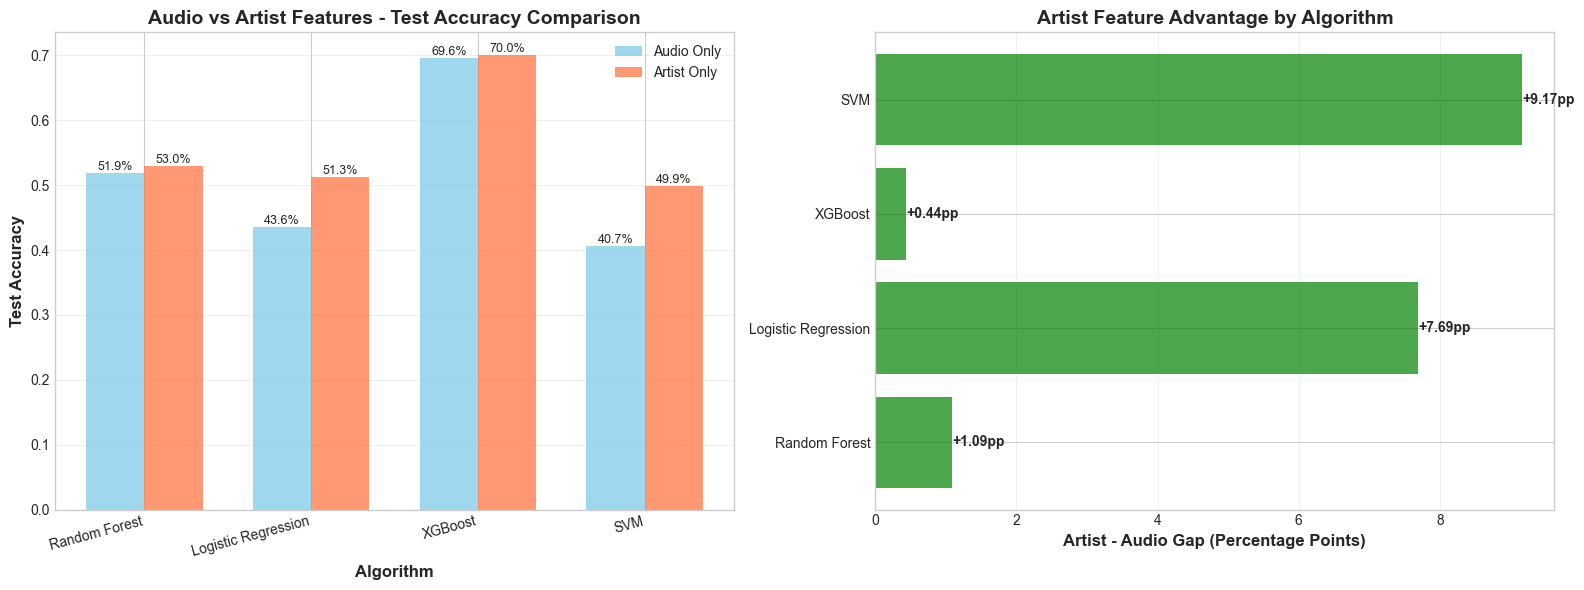

In [32]:
print(" COMPREHENSIVE MODEL COMPARISON - ALL 4 ALGORITHMS")

# Create comprehensive comparison table
results_summary = pd.DataFrame({
    'Algorithm': ['Random Forest', 'Random Forest', 'Random Forest',
                  'Logistic Reg', 'Logistic Reg', 'Logistic Reg',
                  'XGBoost', 'XGBoost', 'XGBoost',
                  'SVM', 'SVM', 'SVM'],
    'Feature Set': ['Audio Only', 'Artist Only', 'Combined'] * 4,
    'Test Accuracy': [
        # Random Forest
        rf_results['Audio']['test_acc'],
        rf_results['Artist']['test_acc'],
        rf_results['Combined']['test_acc'],
        # Logistic Regression
        lr_results['Audio']['test_acc'],
        lr_results['Artist']['test_acc'],
        lr_results['Combined']['test_acc'],
        # XGBoost
        xgb_results['Audio']['test_acc'],
        xgb_results['Artist']['test_acc'],
        xgb_results['Combined']['test_acc'],
        # SVM
        svm_results['Audio']['test_acc'],
        svm_results['Artist']['test_acc'],
        svm_results['Combined']['test_acc']
    ],
    'Test F1-Score': [
        # Random Forest
        rf_results['Audio']['test_f1'],
        rf_results['Artist']['test_f1'],
        rf_results['Combined']['test_f1'],
        # Logistic Regression
        lr_results['Audio']['test_f1'],
        lr_results['Artist']['test_f1'],
        lr_results['Combined']['test_f1'],
        # XGBoost
        xgb_results['Audio']['test_f1'],
        xgb_results['Artist']['test_f1'],
        xgb_results['Combined']['test_f1'],
        # SVM
        svm_results['Audio']['test_f1'],
        svm_results['Artist']['test_f1'],
        svm_results['Combined']['test_f1']
    ]
})

print("\nFULL RESULTS TABLE:")
print(results_summary.to_string(index=False))

# Calculate gaps
print("ARTIST vs AUDIO PERFORMANCE GAP (Percentage Points)")

gaps = pd.DataFrame({
    'Algorithm': ['Random Forest', 'Logistic Regression', 'XGBoost', 'SVM'],
    'Audio Accuracy': [
        rf_results['Audio']['test_acc'],
        lr_results['Audio']['test_acc'],
        xgb_results['Audio']['test_acc'],
        svm_results['Audio']['test_acc']
    ],
    'Artist Accuracy': [
        rf_results['Artist']['test_acc'],
        lr_results['Artist']['test_acc'],
        xgb_results['Artist']['test_acc'],
        svm_results['Artist']['test_acc']
    ]
})

gaps['Gap (pp)'] = (gaps['Artist Accuracy'] - gaps['Audio Accuracy']) * 100
gaps['Gap (%)'] = ((gaps['Artist Accuracy'] - gaps['Audio Accuracy']) / gaps['Audio Accuracy']) * 100
gaps['Winner'] = 'ARTIST'

print(gaps.to_string(index=False))

print("KEY STATISTICS:")
print(f"Average gap: {gaps['Gap (pp)'].mean():.2f} percentage points")
print(f"Median gap: {gaps['Gap (pp)'].median():.2f} percentage points")
print(f"Largest gap: {gaps['Gap (pp)'].max():.2f}pp ({gaps.loc[gaps['Gap (pp)'].idxmax(), 'Algorithm']})")
print(f"Smallest gap: {gaps['Gap (pp)'].min():.2f}pp ({gaps.loc[gaps['Gap (pp)'].idxmin(), 'Algorithm']})")

# Visualization
print("CREATING COMPARISON VISUALIZATIONS")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy Comparison
ax1 = axes[0]
x = np.arange(len(gaps))
width = 0.35

bars1 = ax1.bar(x - width/2, gaps['Audio Accuracy'], width, label='Audio Only', color='skyblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, gaps['Artist Accuracy'], width, label='Artist Only', color='coral', alpha=0.8)

ax1.set_xlabel('Algorithm', fontsize=12, fontweight='bold')
ax1.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Audio vs Artist Features - Test Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(gaps['Algorithm'], rotation=15, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}', ha='center', va='bottom', fontsize=9)

#  Gap Visualization
ax2 = axes[1]
bars = ax2.barh(gaps['Algorithm'], gaps['Gap (pp)'], color='green', alpha=0.7)
ax2.set_xlabel('Artist - Audio Gap (Percentage Points)', fontsize=12, fontweight='bold')
ax2.set_title('Artist Feature Advantage by Algorithm', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2.,
            f'+{width:.2f}pp', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison_all_algorithms.png', dpi=300, bbox_inches='tight')
print("Visualization saved: model_comparison_all_algorithms.png")
plt.show()


 FEATURE IMPORTANCE ANALYSIS

 RANDOM FOREST - FEATURE IMPORTANCE:

Top 10 Most Important Features:
               Feature  Importance
Artist_Past_Avg_Points    0.173192
Artist_Past_Max_Points    0.086892
          Danceability    0.086615
           Speechiness    0.084878
                Energy    0.081970
              Loudness    0.079503
     Artist_Experience    0.078583
               Valence    0.072295
          Acousticness    0.068177
Artist_Days_Since_Last    0.059647

------------------------------------------------------------
Feature Type Summary:
Total Audio Features Importance:  0.4861 (48.6%)
Total Artist Features Importance: 0.5139 (51.4%)

 XGBOOST - FEATURE IMPORTANCE:

Top 10 Most Important Features:
               Feature  Importance
      Is_Collaboration    0.206326
              Is_Debut    0.173535
Artist_Past_Avg_Points    0.099270
     Artist_Experience    0.064185
           Num_Artists    0.056081
Artist_Past_Max_Points    0.052313
                Energy 

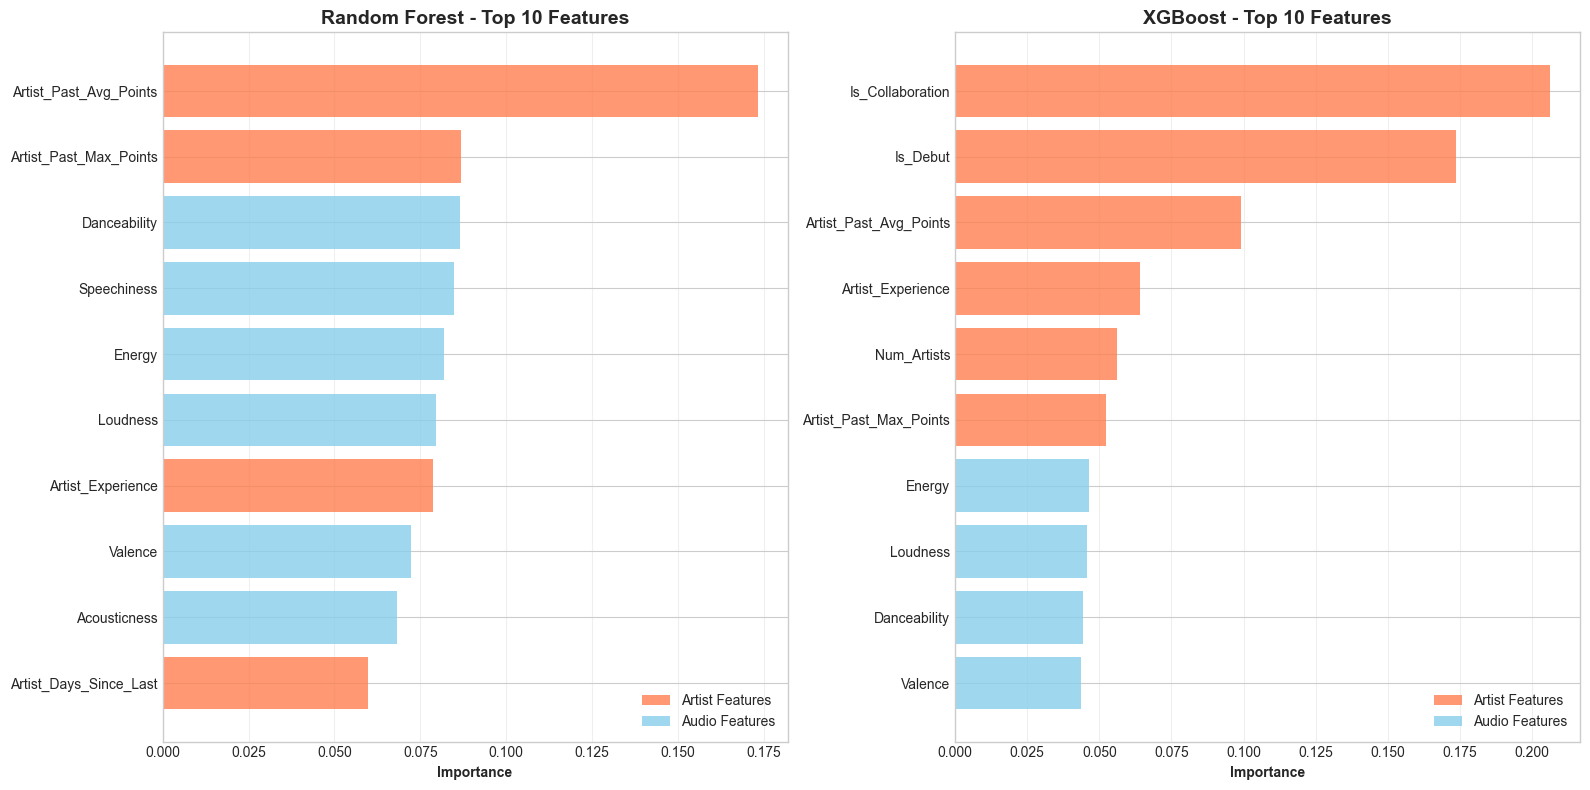


 FEATURE IMPORTANCE KEY FINDINGS:
   Random Forest:  Artist = 51.4% importance
   XGBoost:        Artist = 69.5% importance


In [33]:
print(" FEATURE IMPORTANCE ANALYSIS")

# Using Random Forest and XGBoost for feature importance

print("\n RANDOM FOREST - FEATURE IMPORTANCE:")

# Getting feature importances from combined model
rf_importances = pd.DataFrame({
    'Feature': all_features,
    'Importance': rf_combined.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(rf_importances.head(10).to_string(index=False))

print("\n" + "-"*60)
print("Feature Type Summary:")
rf_audio_importance = rf_importances[rf_importances['Feature'].isin(audio_features)]['Importance'].sum()
rf_artist_importance = rf_importances[rf_importances['Feature'].isin(artist_features)]['Importance'].sum()

print(f"Total Audio Features Importance:  {rf_audio_importance:.4f} ({rf_audio_importance/(rf_audio_importance+rf_artist_importance)*100:.1f}%)")
print(f"Total Artist Features Importance: {rf_artist_importance:.4f} ({rf_artist_importance/(rf_audio_importance+rf_artist_importance)*100:.1f}%)")

print("\n XGBOOST - FEATURE IMPORTANCE:")

# Getting feature importances from combined model
xgb_importances = pd.DataFrame({
    'Feature': all_features,
    'Importance': xgb_combined.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(xgb_importances.head(10).to_string(index=False))

print("Feature Type Summary:")
xgb_audio_importance = xgb_importances[xgb_importances['Feature'].isin(audio_features)]['Importance'].sum()
xgb_artist_importance = xgb_importances[xgb_importances['Feature'].isin(artist_features)]['Importance'].sum()

print(f"Total Audio Features Importance:  {xgb_audio_importance:.4f} ({xgb_audio_importance/(xgb_audio_importance+xgb_artist_importance)*100:.1f}%)")
print(f"Total Artist Features Importance: {xgb_artist_importance:.4f} ({xgb_artist_importance/(xgb_audio_importance+xgb_artist_importance)*100:.1f}%)")

# Visualization

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Random Forest
ax1 = axes[0]
top_features_rf = rf_importances.head(10)
colors_rf = ['coral' if f in artist_features else 'skyblue' for f in top_features_rf['Feature']]
bars1 = ax1.barh(range(len(top_features_rf)), top_features_rf['Importance'], color=colors_rf, alpha=0.8)
ax1.set_yticks(range(len(top_features_rf)))
ax1.set_yticklabels(top_features_rf['Feature'])
ax1.set_xlabel('Importance', fontweight='bold')
ax1.set_title('Random Forest - Top 10 Features', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='coral', alpha=0.8, label='Artist Features'),
                   Patch(facecolor='skyblue', alpha=0.8, label='Audio Features')]
ax1.legend(handles=legend_elements, loc='lower right')

# XGBoost
ax2 = axes[1]
top_features_xgb = xgb_importances.head(10)
colors_xgb = ['coral' if f in artist_features else 'skyblue' for f in top_features_xgb['Feature']]
bars2 = ax2.barh(range(len(top_features_xgb)), top_features_xgb['Importance'], color=colors_xgb, alpha=0.8)
ax2.set_yticks(range(len(top_features_xgb)))
ax2.set_yticklabels(top_features_xgb['Feature'])
ax2.set_xlabel('Importance', fontweight='bold')
ax2.set_title('XGBoost - Top 10 Features', fontsize=14, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)
ax2.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')
print(" Visualization saved: feature_importance_comparison.png")
plt.show()

print("\n FEATURE IMPORTANCE KEY FINDINGS:")
print(f"   Random Forest:  Artist = {rf_artist_importance/(rf_audio_importance+rf_artist_importance)*100:.1f}% importance")
print(f"   XGBoost:        Artist = {xgb_artist_importance/(xgb_audio_importance+xgb_artist_importance)*100:.1f}% importance")


BEST MODEL 1: XGBoost Combined

Confusion Matrix:
                 Predicted Low  Predicted Moderate  Predicted Hit
Actual Low                1227                  35             21
Actual Moderate            320                  28             19
Actual Hit                 132                  24             27

Classification Report:
              precision    recall  f1-score   support

         Low       0.40      0.15      0.22       183
    Moderate       0.73      0.96      0.83      1283
         Hit       0.32      0.08      0.12       367

    accuracy                           0.70      1833
   macro avg       0.49      0.39      0.39      1833
weighted avg       0.62      0.70      0.63      1833

BEST MODEL 2: Random Forest Combined

Confusion Matrix:
                 Predicted Low  Predicted Moderate  Predicted Hit
Actual Low                 852                 320            111
Actual Moderate            151                 151             65
Actual Hit                

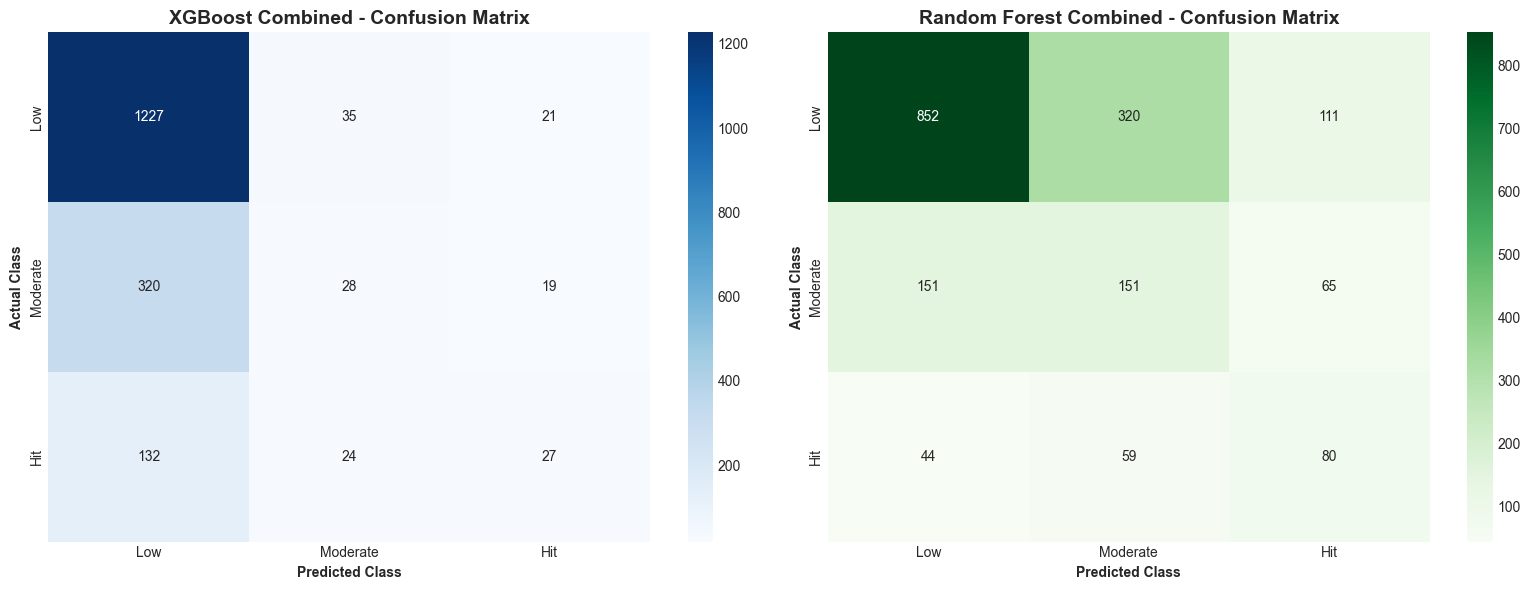


 PER-CLASS PERFORMANCE SUMMARY

   Class         Model  Precision   Recall  F1-Score  Support
     Low       XGBoost   0.730792 0.956352  0.828494     1283
Moderate       XGBoost   0.321839 0.076294  0.123348      367
     Hit       XGBoost   0.402985 0.147541  0.216000      183
     Low Random Forest   0.813754 0.664069  0.731330     1283
Moderate Random Forest   0.284906 0.411444  0.336678      367
     Hit Random Forest   0.312500 0.437158  0.364465      183

 Hit Detection (Recall):
   XGBoost:       14.8% of actual hits correctly identified
   Random Forest: 43.7% of actual hits correctly identified


In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Analyze the two best performing models: XGBoost and Random Forest (Combined)
print("\nBEST MODEL 1: XGBoost Combined")

# Get predictions
y_pred_xgb = xgb_combined.predict(X_combined_test)
y_pred_xgb_decoded = le.inverse_transform(y_pred_xgb)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb_decoded, labels=['Low', 'Moderate', 'Hit'])

print("\nConfusion Matrix:")
cm_df_xgb = pd.DataFrame(cm_xgb, 
                         index=['Actual Low', 'Actual Moderate', 'Actual Hit'],
                         columns=['Predicted Low', 'Predicted Moderate', 'Predicted Hit'])
print(cm_df_xgb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_decoded, target_names=['Low', 'Moderate', 'Hit']))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# XGBoost Confusion Matrix
ax1 = axes[0]
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Low', 'Moderate', 'Hit'],
            yticklabels=['Low', 'Moderate', 'Hit'])
ax1.set_title('XGBoost Combined - Confusion Matrix', fontsize=14, fontweight='bold')
ax1.set_ylabel('Actual Class', fontweight='bold')
ax1.set_xlabel('Predicted Class', fontweight='bold')

# Random Forest Confusion Matrix
print("BEST MODEL 2: Random Forest Combined")

y_pred_rf = rf_combined.predict(X_combined_test)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['Low', 'Moderate', 'Hit'])

print("\nConfusion Matrix:")
cm_df_rf = pd.DataFrame(cm_rf, 
                        index=['Actual Low', 'Actual Moderate', 'Actual Hit'],
                        columns=['Predicted Low', 'Predicted Moderate', 'Predicted Hit'])
print(cm_df_rf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Low', 'Moderate', 'Hit']))

# Visualize RF
ax2 = axes[1]
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax2,
            xticklabels=['Low', 'Moderate', 'Hit'],
            yticklabels=['Low', 'Moderate', 'Hit'])
ax2.set_title('Random Forest Combined - Confusion Matrix', fontsize=14, fontweight='bold')
ax2.set_ylabel('Actual Class', fontweight='bold')
ax2.set_xlabel('Predicted Class', fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrices_best_models.png', dpi=300, bbox_inches='tight')
print("\n Confusion matrices saved!")
plt.show()

# Performance by class
print("\n PER-CLASS PERFORMANCE SUMMARY")

# Calculate per-class metrics for both models
from sklearn.metrics import precision_recall_fscore_support

xgb_metrics = precision_recall_fscore_support(y_test, y_pred_xgb_decoded, 
                                               labels=['Low', 'Moderate', 'Hit'],
                                               average=None)
rf_metrics = precision_recall_fscore_support(y_test, y_pred_rf, 
                                              labels=['Low', 'Moderate', 'Hit'],
                                              average=None)

metrics_comparison = pd.DataFrame({
    'Class': ['Low', 'Moderate', 'Hit'] * 2,
    'Model': ['XGBoost']*3 + ['Random Forest']*3,
    'Precision': list(xgb_metrics[0]) + list(rf_metrics[0]),
    'Recall': list(xgb_metrics[1]) + list(rf_metrics[1]),
    'F1-Score': list(xgb_metrics[2]) + list(rf_metrics[2]),
    'Support': list(xgb_metrics[3]) + list(rf_metrics[3])
})

print("\n" + metrics_comparison.to_string(index=False))

# Calculate accuracy for predicting Hits specifically
xgb_hit_recall = xgb_metrics[1][2]  # Recall for Hit class
rf_hit_recall = rf_metrics[1][2]

print(f"\n Hit Detection (Recall):")
print(f"   XGBoost:       {xgb_hit_recall:.1%} of actual hits correctly identified")
print(f"   Random Forest: {rf_hit_recall:.1%} of actual hits correctly identified")
